Gerard Marrugat

## Genetic Algorithm

If it is needed the code could be obtained in my GitHub repository:

[https://github.com/gmarrugat/DataScience/blob/master/genetic_algorithm.py](https://github.com/gmarrugat/DataScience/blob/master/genetic_algorithm.py)

In [75]:




import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt

In [30]:
def fitness_function(x,y):
    return (21.5 + x*np.sin(4*np.pi*x) + y*np.sin(20*np.pi*y))

def init_population(pop_size):
    
    chrom_population = []
    
    for i in range(pop_size):
    
        x = np.random.randint(0,2,18) #x
        y = np.random.randint(0,2,15) #y

        chromosome = np.concatenate((x,y),axis=0)
        
        chrom_population.append(chromosome)
    
    return np.array(chrom_population)

def base2_base10(vector):
    
    vector_10 = 0
    m = len(vector)
    for i in range(0,m):
        vector_10 = vector_10 + vector[i]*2**i 
    
    return vector_10

def vec_in_range(vec,a,b,m):
    
    return(a + (b-a)*vec/((2**m)-1))

def evaluation(population):
#evaluate population
    fitness_values = []

    for chrom in population:
        x_bin = chrom[:m_x]
        y_bin = chrom[m_x:]
    
        x_dec = base2_base10(x_bin)
        y_dec = base2_base10(y_bin)
    
        x = vec_in_range(x_dec,a_x,b_x,m_x)
        y = vec_in_range(y_dec,a_y,b_y,m_y)
    
        fitness_values.append(fitness_function(x,y))
    
        return fitness_values
    
def best_chromosome(population):

    fitness_values = evaluation(population)

    idx_best_one = np.argsort(fitness_values)[-1]
    
    x_bin_best = population[idx_best_one][:m_x]
    y_bin_best = population[idx_best_one][m_x:]
    
    x_dec_best = base2_base10(x_bin_best)
    y_dec_best = base2_base10(y_bin_best)
    
    x_best = vec_in_range(x_dec_best,a_x,b_x,m_x)
    y_best = vec_in_range(y_dec_best,a_y,b_y,m_y)
        
    return (fitness_function(x_best,y_best),x_best,y_best)

def roulette_wheel(population,pop_size,fitness_values):

    new_population = []
    F_total = sum(fitness_values)
    prob_selection = fitness_values/F_total
    q = np.cumsum(prob_selection)

    for t in range(0,pop_size):
        r = np.random.rand(1)
        idx_chrom = min(np.argwhere(r < q))[0]
        new_population.append(population[idx_chrom])
    
    return(np.array(new_population))

def crossover(population,pop_size,p_c):

    r = np.random.rand(pop_size)
    cross_population = population[(r< p_c)]
    idx_cross = np.argsort(r<p_c)

    if len(cross_population)%2 != 0:
        cross_population = cross_population[:-1]


    for i in range(0,np.int(len(cross_population)/2)):
        
        pos = np.int(np.random.randint(1,m_x+m_y,1))
    
        bi = cross_population[2*i]
        bi_prima = bi
        bi_1 = cross_population[2*i+1]
        bi_1_prima = bi_1

        bi_1_prima[pos:] = bi[pos:]
        bi_prima[pos:] = bi_1[pos:]
    
        population[idx_cross[2*i]] = bi_prima
        population[idx_cross[2*i+1]] = bi_1_prima
    
    return population

def mutation(population,p_m):
    for chrom in population:
        for j in range(0,len(chrom)):
            r = np.random.rand(1)[0]
            if (r < p_m):
                chrom[j] = chrom[j]^1 #complement
    return population

The algorithm stops when a maximum of generations have evolved (1000).

Previously we have defined some functions that will make easier the execution of each Genetic algorithm step.

In [31]:
# Initialize values
a_x = -3.0 
b_x = 12.11
m_x = 18

a_y = 4.5
b_y = 5.8
m_y = 15

fitness = [] #lists for fitness,x and y values for a posterior plot
x_list = []
y_list = []

pop_size = 50

p_c = 0.25
p_m = 0.01

N_iter = 0

# Initial population
population = init_population(pop_size)

while N_iter < 1e3:
    #Evaluate current population
    fitness_values = evaluation(population)

    #Find the best solution in current population and append it to the list
    best_fitness,x_best, y_best = best_chromosome(population)
    
    fitness.append(best_fitness)
    x_list.append(x_best)
    y_list.append(y_best)

    #Select a new population
    population = roulette_wheel(population,pop_size,fitness_values)
    
    #Crossover operation
    population = crossover(population,pop_size,p_c)
    
    #Mutation operation
    population = mutation(population,p_m)
    
    #At this point we have a new population to be evaluated 
        
    N_iter +=1
    
#Finally we have a list with the best solutions for each iteration
#We can plot it 
fitness = np.array(fitness)
x_list = np.array(x_list)
y_list = np.array(y_list)

In [74]:
argmax = np.argmax(fitness)

print('Maximum value of fitness function',fitness[argmax])
print('Location of maximum fitness value (x,y) = (',x_list[argmax],',',y_list[argmax],')')

Maximum value of fitness function 35.07514124346216
Location of maximum fitness value (x,y) = ( 8.10964820727618 , 5.62594988860744 )


We can observe the proposals for the optimal solution generated iteratively. 

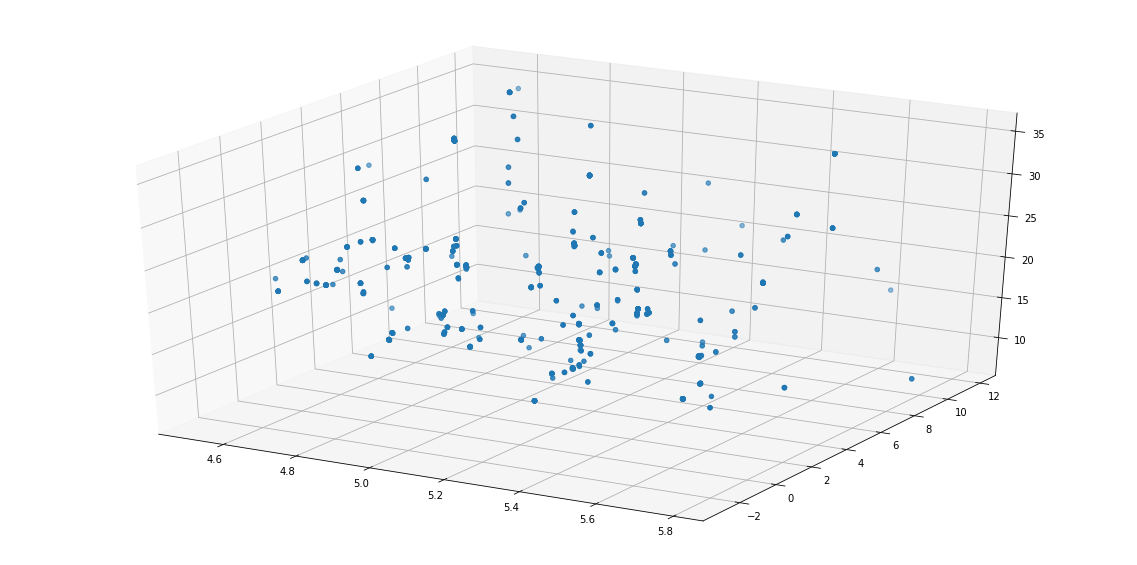

In [71]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.scatter(y_list, x_list, fitness)
plt.show()

Or we can plot the trajectory of this points. Red dot is the solution which maximizes our evaluation function:

$$
f(x,y) = 21.5 + x sin(4\pi x) + y sin(20\pi y)
$$

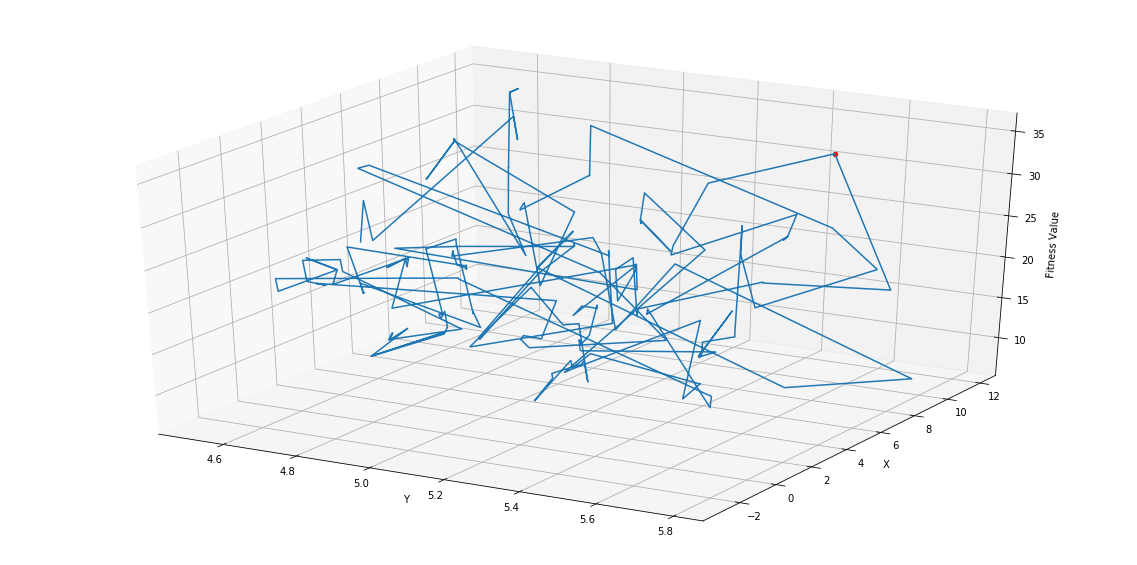

In [70]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.scatter(y_list[argmax], x_list[argmax], fitness[argmax], marker='o', color='r')
ax.plot(y_list, x_list, fitness, label='parametric curve')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Fitness Value')
plt.show()